In [1]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20140320/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_1/20140320/after'
pcap_dir_list = sorted(os.listdir(before_path))

import statistics


In [2]:
# CM
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    if "pcap" not in pcap_dir:
        continue
    for inst_name in ["inst1", "inst2", "inst3", "inst4", "inst5", "inst6"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[10.838526478932637, 0.3940835196172834, 0.11872417240522166, 0.21129612776175272, 0.298919057578965, 0.16455154940151331, 0.12288006548605362, 0.7123304485517749, 0.7742541427448547, 0.22597145510874042, 0.1846390880266929, 3.8833921479281694, 4.675787097325514, 4.378074141464362, 5.178374158976228, 12.501424403576472, 0.36699086458912666, 0.15711146621578084, 0.16904636949173843, 0.2551870182464447, 0.3021779671976499, 0.1041946752368141, 0.8023074045658486, 0.7321915131808601, 0.2311460271716535, 0.18170288352555228, 5.657959574359924, 5.042075765290137, 5.409857563725413, 5.028000118751545, 10.104211749561824, 0.2525017350651553, 0.11685588373107059, 0.24379203078228937, 0.22049011274962235, 0.256466478900714, 0.1315644355062622, 0.7121548791830071, 0.6002857097175818, 0.2831586910974322, 0.22845235898674499, 4.555604728035496, 5.441575055111936, 4.181583393876772, 4.964870044586908, 8.996040982804669, 0.3707205167353198, 0.1103287213535775, 0.14188690228861137, 0.16516418981463546

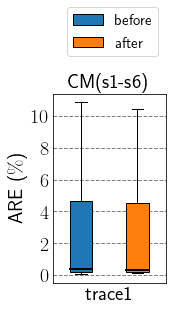

In [3]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CM(s1-s6)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
# plt.ylim([0, 6])
from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("CM.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()
